# import libaries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

# Import algs

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
data = pd.read_csv("HCV-Egy-Data.csv")


In [ ]:
data.head(5)


,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [ ]:
data[data.columns[13]].unique()

array([112132., 129367., 151522., ..., 128354., 205908., 136615.])

# changing numerical to categorical ,Discretization 

In [ ]:

data[data.columns[0]] = pd.cut(data[data.columns[0]], bins=[0, 32, 37,42,47,52,57,62, float('Inf')], labels=False)#age
data[data.columns[2]] = pd.cut(data[data.columns[2]], bins=[0, 18.5, 25,30,35,40, float('Inf')], labels=False)#Bmi
data[data.columns[10]] = pd.cut(data[data.columns[10]], bins=[0, 4000, 11000,12101, float('Inf')], labels=False)#WBC
data[data.columns[11]] = pd.cut(data[data.columns[11]], bins=[0, 3000000, 5000000,5018451, float('Inf')], labels=False)#RBC

if (data[data.columns[1]] == 1).any() :
  data[data.columns[12]] = pd.cut(data[data.columns[12]], bins=[2, 14, 17.5,20, float('Inf')], labels=False)#HGB
else: 
  data[data.columns[12]] = pd.cut(data[data.columns[12]], bins=[2, 12.3, 15.3,20, float('Inf')], labels=False)#HGB

data[data.columns[13]] = pd.cut(data[data.columns[13]], bins=[93012, 100000, 155001,226465, float('Inf')], labels=False)#PLAT


for i in [14,15,16,17,18,19,20,21] :
  data[data.columns[i]] = pd.cut(data[data.columns[i]], bins=[0, 20, 40,128, float('Inf')], labels=False)#14-21


data[data.columns[22]] = pd.cut(data[data.columns[22]], bins=[0, 6, 1201086, float('Inf')], labels=False)#RNA Base
data[data.columns[23]] = pd.cut(data[data.columns[23]], bins=[0, 6, 1201715, float('Inf')], labels=False)#RNA 4
data[data.columns[24]] = pd.cut(data[data.columns[24]], bins=[0, 6, 3731527, float('Inf')], labels=False)#RNA 12
data[data.columns[25]] = pd.cut(data[data.columns[25]], bins=[0, 6, 808450, float('Inf')], labels=False)#RNA EOT
data[data.columns[26]] = pd.cut(data[data.columns[26]], bins=[0, 6, 808450, float('Inf')], labels=False)#RNA EF(Elongation Factor)

    


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null int64
HGB                                 1385 non-null int64
Plat                                1385 non-null int64
AST 1                               1385 non-null int64
ALT 1                               1385 non-null int

## Check null and missing value

In [ ]:
data.isnull().sum()


Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [ ]:
data.size

40165

In [ ]:
data.shape

(1385, 29)

In [ ]:
data.describe(include='all')

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.0,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,3.267870,1.489531,2.085921,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,1.016606,1.020217,0.186282,1.462094,1.976895,1.976895,1.976895,1.975451,1.976173,1.970397,1.976895,1.210108,1.0,0.999278,0.722022,0.722744,0.726354,9.761733,2.536462
std,1.775235,0.500071,0.807647,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,0.487279,0.140791,0.389474,0.601215,0.150290,0.150290,0.150290,0.154801,0.152564,0.181886,0.164081,0.412817,0.0,0.026870,0.448164,0.447806,0.450825,4.023896,1.121392
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,6.000000,2.000000
50%,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000
75%,5.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,2.000000,16.000000,4.000000


# Feature Selection

In [ ]:



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:28]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features








                            Specs     Score
27  Baseline histological Grading  5.353347
0                            Age   2.572351
2                             BMI  2.485752
1                          Gender  1.119019
9                Epigastric pain   1.089205
4                  Nausea/Vomting  0.854361
12                            HGB  0.720400
8                       Jaundice   0.611780
10                            WBC  0.583620
26                         RNA EF  0.489587


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.12383856 0.03211471 0.0738635  0.04247351 0.03645198 0.05862853
 0.05375092 0.04976151 0.04550927 0.03742492 0.05556816 0.00661285
 0.0397623  0.07157904 0.00552455 0.0087185  0.01000363 0.00730595
 0.00736281 0.00730917 0.00888634 0.03979337 0.         0.00028147
 0.01191369 0.0104229  0.01271564 0.1424222 ]


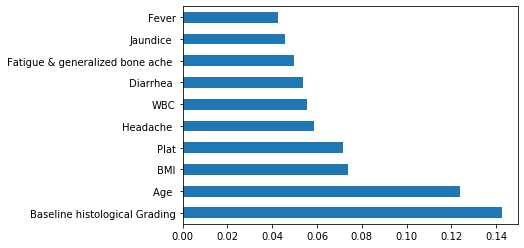

In [ ]:
X = data.iloc[:,0:28]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#  27 Baseline , 0 ge ,  2 BMI , 1 Gender ,  13 Plat, 10 WBC , 6 Diarrhea

# Cleaning The Dataset

In [ ]:
data = data[[data.columns[0],data.columns[1],data.columns[2] ,data.columns[6] ,data.columns[10] ,data.columns[13] ,data.columns[27],data.columns[28] ]] 
df = pd.DataFrame(data, columns = data.columns)


In [ ]:
X = df.drop(df.columns[-1] , 1)
y = df[df.columns[-1]]

In [ ]:
from keras.utils import to_categorical

y = [x-1 for x in y]
#one-hot encode target column
y = to_categorical(y)

#vcheck that target column has been converted
y[0:5]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Create training and testing datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Feature scaling

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)


-

-

-

-

-

-

-

-



# Compare each classifiers

In [ ]:
# Logisitic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
#Checking the accuracy
logistic_accuracy = round(logreg.score(X_train,y_train)*100,2)
print(round(logistic_accuracy,2),'%')


scores = cross_val_score(logreg, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

In [ ]:
#Decesion Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

scores = cross_val_score(decision_tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
                                       
y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = round(decision_tree.score(X_train,y_train) * 100,2)
print(round(decision_tree_accuracy,2),'%')

Accuracy: 0.21 (+/- 0.04)
85.86 %


In [ ]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)
perceptron_accuracy = round(perceptron.score(X_train,y_train)* 100,2)
print(round(perceptron_accuracy,2),'%')

scores = cross_val_score(perceptron, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ValueError: ignored

In [ ]:
# Randon Forest
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train,y_train)

y_pred = rand_forest.predict(X_test)
rand_forest_accuracy = round(rand_forest.score(X_train,y_train)*100,2)
print(round(rand_forest_accuracy,2),'%')

scores = cross_val_score(rand_forest, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

93.42 %
Accuracy: 0.23 (+/- 0.02)


In [ ]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

y_pred = gaussian.predict(X_test)
gaussian_accuracy = round(gaussian.score(X_train,y_train)*100,2)
print(round(gaussian_accuracy,2),'%')

scores = cross_val_score(gaussian, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

30.96 %
Accuracy: 0.24 (+/- 0.04)


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
knn_accuracy = round(knn.score(X_train,y_train)*100,2)
print(round(knn_accuracy,2),'%')

scores = cross_val_score(knn, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

55.66 %
Accuracy: 0.23 (+/- 0.04)


In [ ]:
#LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)

y_pred = linear_svc.predict(X_test)
linear_svc_accuracy = round(linear_svc.score(X_train,y_train)*100,2)
print(round(linear_svc_accuracy,2),'%')

scores = cross_val_score(linear_svc, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


30.96 %


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.24 (+/- 0.03)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#SVC
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
svc_accuracy = round(svc.score(X_train,y_train)*100,2)
print(round(svc_accuracy,2),'%')

scores = cross_val_score(svc, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

45.52 %
Accuracy: 0.23 (+/- 0.06)


# Compare Classifiers in a table

In [ ]:
model_evaluation = pd.DataFrame({
    'Model':['LogisticRegression','DecisionTreeClassifier','Perceptron','RandomForestClassifier',
             
             'GaussianNB','KNeighborsClassifier','LinearSVC','SVC'],
    
    'Score':[logistic_accuracy,decision_tree_accuracy,perceptron_accuracy,rand_forest_accuracy,
             gaussian_accuracy,knn_accuracy,linear_svc_accuracy,svc_accuracy,]})
model_evaluation.sort_values(by='Score',ascending = False)

,Model,Score
1,DecisionTreeClassifier,93.42
3,RandomForestClassifier,93.42
5,KNeighborsClassifier,55.66
7,SVC,45.52
4,GaussianNB,30.96
6,LinearSVC,30.96
0,LogisticRegression,30.74
2,Perceptron,27.62


In [ ]:
X_train

,Age,Gender,BMI,Diarrhea,WBC,Plat,Baseline histological Grading
260,0,1,2,2,0,2,5
715,1,2,1,2,1,2,4
718,0,1,2,1,1,2,6
707,0,1,3,1,1,2,10
1139,2,1,3,2,0,2,9
...,...,...,...,...,...,...,...
1095,6,2,1,1,1,1,12
1130,2,2,3,2,2,1,8
1294,2,1,2,1,1,1,9
860,4,2,2,1,1,2,14


# Building A Deep Learning Model using Keras

[1, 0, 3, 0, 3]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=7, activation='tanh', name='layer_1'))
    model.add(Dense(10, activation='tanh', name='layer_2'))
    model.add(Dense(10, activation='tanh', name='layer_3'))
    model.add(Dense(4, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

# Do the Model cross validation

In [ ]:
estimator = KerasClassifier(
        build_fn=model,
        epochs=100, batch_size=20,
        verbose=2)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(estimator, X_train, y_train, cv=kfold )
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
 - 3s - loss: 1.4130 - acc: 0.2594
Epoch 2/100
 - 0s - loss: 1.4002 - acc: 0.2477
Epoch 3/100
 - 0s - loss: 1.3922 - acc: 0.2503
Epoch 4/100
 - 0s - loss: 1.3888 - acc: 0.2529
Epoch 5/100
 - 0s - loss: 1.3873 - acc: 0.2723
Epoch 6/100
 - 0s - loss: 1.3857 - acc: 0.2839
Epoch 7/100
 - 0s - loss: 1.3836 - acc: 0.2877
Epoch 8/100
 - 0s - loss: 1.3831 - acc: 0.2787
Epoch 9/100
 - 0s - loss: 1.3838 - acc: 0.2684
Epoch 10/100
 - 0s - loss: 1.3808 - acc: 0.2735
Epoch 11/100
 - 0s - loss: 1.3797 - acc: 0.2839
Epoch 12/100
 - 0s - loss: 1.3801 - acc: 0.2994
Epoch 13/100
 - 0s - loss: 1.3791 - acc: 0.2800
Epoch 14/100
 - 0s - loss: 1.3785 - acc: 0.2890
Epoch 15/100
 - 0s - loss: 1.3794 - acc: 0.2826
Epoch 16/100
 - 0s - loss: 1.3822 - acc: 0.2968
Epoch 17/100
 - 0s - loss: 1.3782 - acc: 0.2942
Epoch 18/100
 - 0s - loss: 1.3778 - acc: 0.2942
Epoch 19/100
 - 0s - loss: 1.3775 - acc: 0.3032
Epoch 20/100
 - 0s - loss: 1.3799 - acc: 0.2839
Epoch 21/100
 - 0s - loss: 1.3775 - acc: 0.2916
E

In [ ]:
y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

model = model()
#train model
model.fit(X, y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 1108 samples, validate on 277 samples
Epoch 1/30
1108/1108 [==============================] - 4s 4ms/step - loss: 1.4232 - acc: 0.2410 - val_loss: 1.3830 - val_acc: 0.3285
Epoch 2/30
1108/1108 [==============================] - 0s 78us/step - loss: 1.3878 - acc: 0.2446 - val_loss: 1.3788 - val_acc: 0.2924
Epoch 3/30
1108/1108 [==============================] - 0s 70us/step - loss: 1.3870 - acc: 0.2545 - val_loss: 1.3802 - val_acc: 0.3141
Epoch 4/30
1108/1108 [==============================] - 0s 70us/step - loss: 1.3883 - acc: 0.2383 - val_loss: 1.3792 - val_acc: 0.3032
Epoch 5/30
1108/1108 [==============================] - 0s 72us/step - loss: 1.3862 - acc: 0.2473 - val_loss: 1.3814 - val_acc: 0.2780
